5) ozone

In [1]:
import pandas as pd

# csv 파일을 로딩

df = pd.read_csv("c:/workspace/data/ozone/ozone2.csv")

df.head()

,Month,Day,Solar.R,Wind,Temp,Ozone,Result
0,5,21,8.0,9.7,59,1,0
1,5,23,25.0,9.7,61,4,0
2,5,18,78.0,18.4,57,6,0
3,7,15,48.0,14.3,80,7,0
4,9,24,49.0,10.3,69,7,0


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

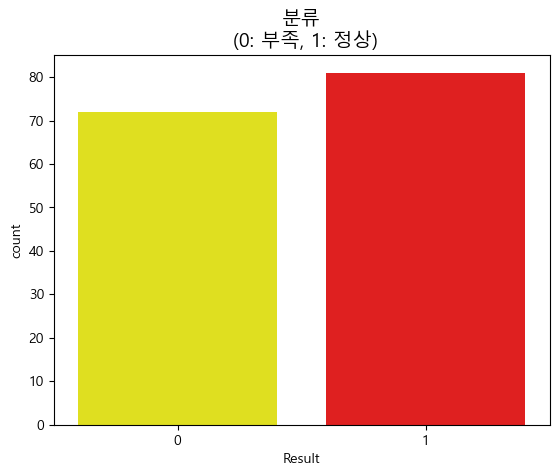

In [2]:
from matplotlib import font_manager, rc

import matplotlib.pyplot as plt

#한글 처리를 위해 폰트 설정

font_name = font_manager.FontProperties(\

fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Result', data=df, palette=colors)

plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

#불균형 데이터셋

In [3]:
train_cols=['Solar.R', 'Wind', 'Temp']

X = df[train_cols]  

y = df['Result']

In [4]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )

y_samp = pd.DataFrame(data=y_sample,columns=['Result'])

df_samp=pd.concat([X_samp,y_samp],axis=1)

df_samp["Result"].value_counts()

Result
0    72
1    72
Name: count, dtype: int64

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\tjoeun\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


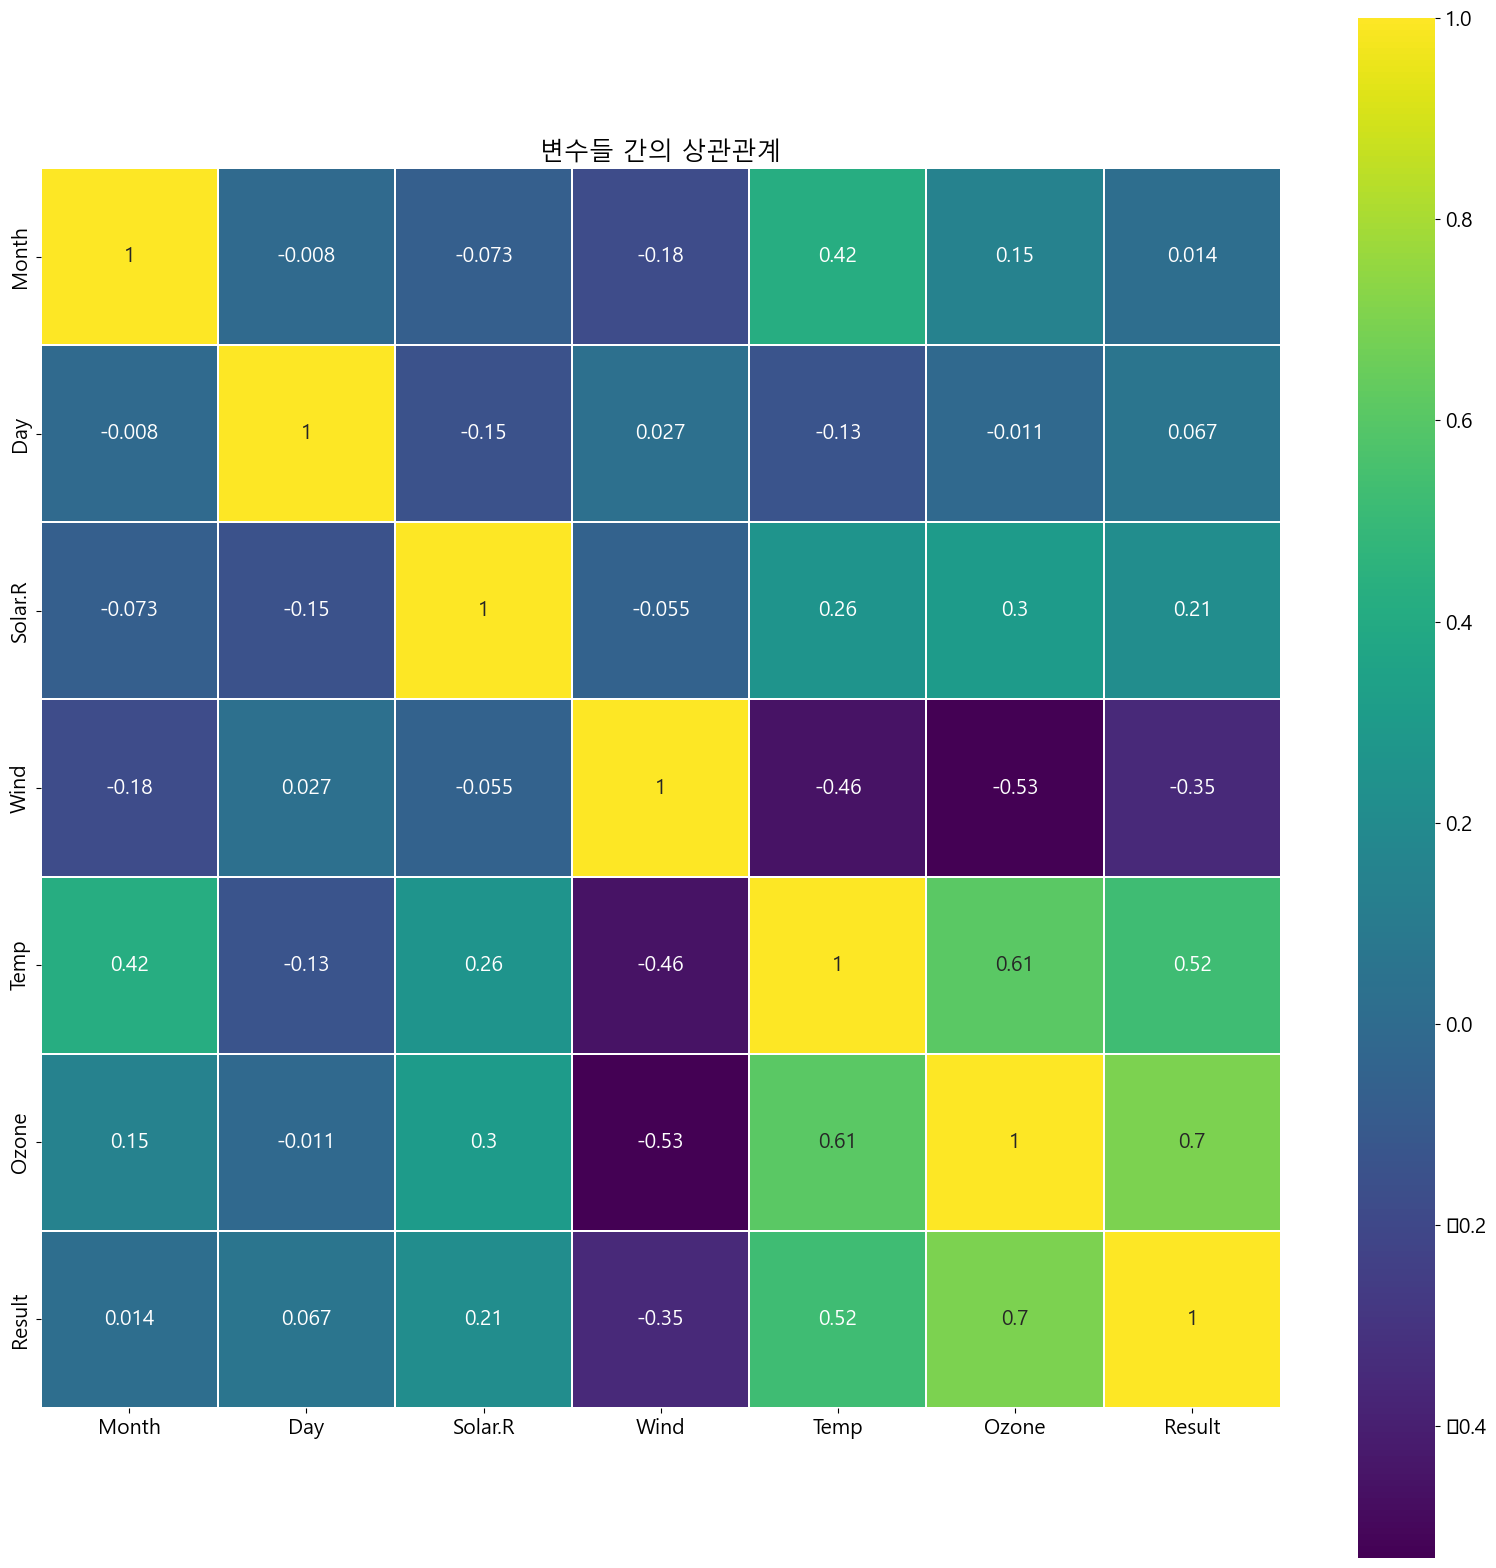

In [5]:
X = X_samp[train_cols]

y = y_samp['Result']

df_samp["Result"].value_counts()

#상관계수 행렬 그래프

plt.figure(figsize=(20, 20))

plt.rc('font', size=15)

sns.heatmap(df.corr(), linewidths=0.01, square=True,

            annot=True, cmap=plt.cm.viridis, linecolor="white")

plt.title('변수들 간의 상관관계')

plt.show()

In [6]:
from sklearn.model_selection import train_test_split
#데이터셋 구분

X_train, X_test, y_train, y_test = train_test_split(X, y,

    stratify=y,test_size=0.2, random_state=7)

In [7]:
from keras.models import Sequential

from keras.layers import Dense

# 3. 모델 구성

model = Sequential(name='mymodel')

# 노드개수, 독립변수 개수, 활성화함수 relu

model.add(Dense(128, input_shape=(len(X_train.columns),), activation='relu',name='hidden-1'))

model.add(Dense(64, activation='relu',name='hidden-2'))

model.add(Dense(64, activation='relu',name='hidden-3'))

# sigmoid : 0.0~1.0

model.add(Dense(1, activation='sigmoid',name='output'))

# 4. 모델 학습과정 설정

model.compile(loss='mse', optimizer='adam',

              metrics=['accuracy'])

In [8]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler() #평균 0, 표준편차 1로 만드는 스케일러

scaler.fit(X_train)

X_train_scaled=scaler.transform(X_train)

X_test_scaled=scaler.transform(X_test)

In [9]:
from datetime import datetime  

import tensorflow as tf  

logdir="c:/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")  

logdir

# tensorboard --logdir=c:/logs/20230719-153833 명령어로 확인 가능

'c:/logs/20230720-104647'

In [10]:
# pip install tensorboard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)  

# 5. 모델 학습

hist = model.fit(X_train_scaled, y_train, epochs=500,callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 1s 6ms/step - loss: 0.2526 - accuracy: 0.4522
Epoch 2/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2309 - accuracy: 0.7826
Epoch 3/500
4/4 [==============================] - 0s 6ms/step - loss: 0.2138 - accuracy: 0.7652
Epoch 4/500
4/4 [==============================] - 0s 4ms/step - loss: 0.1982 - accuracy: 0.7652
Epoch 5/500
4/4 [==============================] - 0s 4ms/step - loss: 0.1826 - accuracy: 0.7652
Epoch 6/500
4/4 [==============================] - 0s 4ms/step - loss: 0.1695 - accuracy: 0.7652
Epoch 7/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1611 - accuracy: 0.7565
Epoch 8/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1550 - accuracy: 0.7565
Epoch 9/500
4/4 [==============================] - 0s 4ms/step - loss: 0.1499 - accuracy: 0.7565
Epoch 10/500
4/4 [==============================] - 0s 5ms/step - loss: 0.1469 - accuracy: 0.7739
Epoch 11/500
4/4 [===========

In [11]:
#anaconda prompt에서 실행

#tensorboard --logdir=로그파일경로

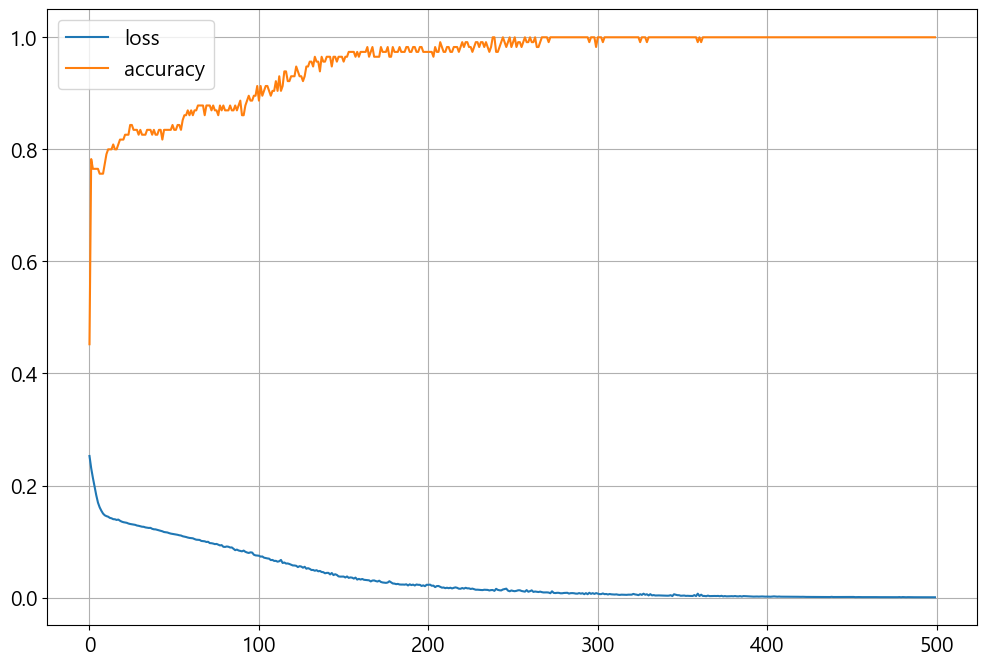

In [12]:
# 6. 모델 학습 과정 표시

plt.figure(figsize=(12,8))

plt.plot(hist.history['loss']) #학습용 데이터셋의 손실률

plt.plot(hist.history['accuracy']) #학습용 데이터셋의 정확도

plt.legend(['loss','accuracy'])

plt.grid()

plt.show()

In [13]:
# 7. 모델 평가

scores = model.evaluate(X_train_scaled, y_train)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #학습용

scores = model.evaluate(X_test_scaled, y_test)

print(scores)

print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100)) #검증용

4/4 [==============================] - 0s 2ms/step - loss: 5.4930e-04 - accuracy: 1.0000
[0.0005492963246069849, 1.0]
accuracy: 100.00%
1/1 [==============================] - 0s 23ms/step - loss: 0.3004 - accuracy: 0.6552
[0.30044394731521606, 0.6551724076271057]
accuracy: 65.52%


In [14]:
#새로운 값 예측

#일조량 25, 풍량 10.8, 화씨온도 71도일 때의 오존량

test_set = [[25, 10.8, 71]]

test_set=scaler.transform(test_set)

print(model.predict(test_set)) # 1일 확률 0%

1/1 [==============================] - 0s 76ms/step
[[0.05998375]]


c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [15]:
#일조량 255, 풍량 4.3, 화씨온도 90도일 때의 오존량

test_set = [[25, 4.3, 90]]

test_set=scaler.transform(test_set)

print(model.predict(test_set)) # 1일 확률 98.5%

c:\Users\tjoeun\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step
[[1.]]


In [16]:
model.save('c:/workspace/data/ozone/ozone.h5')

In [17]:
import joblib

joblib.dump(scaler,'c:/workspace/data/ozone/scaler.model')

['c:/workspace/data/ozone/scaler.model']